<a href="https://colab.research.google.com/github/vnguyen1801/traveler-trip-analysis/blob/main/Assignment_9_Python_reading_and_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✈️ Traveler Trip Analysis — Travel Patterns and What They Reveal
**Take-home message:** Travel behavior highlights which destinations connect most people and how trip length and transport type drive spending.

**Author:** Vi Nguyen  
**Dataset (repo):** https://github.com/vnguyen1801/traveler-trip-analysis


## Motivation and dataset
In a world where travel is both leisure and necessity, studying trip records helps us see patterns in destination popularity, transportation preferences, and spending. This notebook uses the dataset from the Traveler Trip Analysis repository.

**Motivation:** I want to understand which countries are most visited, how travelers choose transport (plane, car, train), and how trip duration relates to spending.

**Summary of prior results (this semester):**
- Top 10 visited countries were identified using Power BI.
- Planes dominate long-distance trips (some entries spelled as "airplain" or "plane").
- Longer trips generally correlate with higher expenditures.

This notebook builds on those results by loading the raw data into Python, cleaning common issues (e.g., inconsistent transport labels), performing exploratory analysis, and producing visualizations to support the take-home message.


## Notebook plan / Outline
1. Load the dataset from the GitHub repository.
2. Inspect the data (head, dtypes, missing values).
3. Clean and standardize fields (e.g., unify "plane" / "airplain" -> "plane", fix currency strings).
4. Basic descriptive stats (counts, means, distributions).
5. Visualizations:
   - Top destinations (bar chart)
   - Transportation types (bar chart)
   - Trip duration vs. expenditure (scatter + trend)
6. Short conclusions & next steps (ideas for further analysis)


In [ ]:
# Code cell: imports and dataset loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats
from IPython.display import display
import random

# Plot style convenience (do not force colors)
plt.rcParams['figure.figsize'] = (9,5)


try:
    # Try to use local file if previously uploaded
    import os
    if os.path.exists("trips.csv"):
        df = pd.read_csv("trips.csv")
    else:
        raise FileNotFoundError
except Exception:

    try:
        from google.colab import files
        print("Running in Colab: please upload your CSV file when prompted (it will be saved as the filename you choose).")
        uploaded = files.upload()  # choose file via dialog
        # grab the first uploaded file
        first_filename = next(iter(uploaded))
        df = pd.read_csv(first_filename)
    except Exception:
        # Last resort: ask user to manually set path
        print("Automatic upload not available. If you're running locally, make sure the CSV is named 'trips.csv' in the current folder, or change the path in the cell.")
        df = None

# Show initial info
if df is not None:
    print("Dataframe loaded. Shape:", df.shape)
    display(df.head())
else:
    print("No dataframe loaded. Please provide a CSV file (see instructions).")


Running in Colab: please upload your CSV file when prompted (it will be saved as the filename you choose).


Saving Travel details dataset.csv to Travel details dataset.csv
Dataframe loaded. Shape: (139, 13)


,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Trip ID'].plot(kind='hist', bins=20, title='Trip ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Duration (days)'].plot(kind='hist', bins=20, title='Duration (days)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Traveler age'].plot(kind='hist', bins=20, title='Traveler age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Destination').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Start date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('End date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Traveler name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='index', y='Trip ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Trip ID', y='Duration (days)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Duration (days)', y='Traveler age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Duration (days)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Destination')):
  _plot_series(series, series_name, i)
  fig.legend(title='Destination', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Duration (days)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Duration (days)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Start date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Start date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Duration (days)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Duration (days)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('End date')):
  _plot_series(series, series_name, i)
  fig.legend(title='End date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Duration (days)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Duration (days)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Traveler name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Traveler name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Duration (days)')

from matplotlib import pyplot as plt
_df_15['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Trip ID'].plot(kind='line', figsize=(8, 4), title='Trip ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Duration (days)'].plot(kind='line', figsize=(8, 4), title='Duration (days)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['Traveler age'].plot(kind='line', figsize=(8, 4), title='Traveler age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Start date'].value_counts()
    for x_label, grp in _df_19.groupby('Destination')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Destination')
_ = plt.ylabel('Start date')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['End date'].value_counts()
    for x_label, grp in _df_20.groupby('Start date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Start date')
_ = plt.ylabel('End date')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Traveler name'].value_counts()
    for x_label, grp in _df_21.groupby('End date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('End date')
_ = plt.ylabel('Traveler name')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Traveler gender'].value_counts()
    for x_label, grp in _df_22.groupby('Traveler name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Traveler name')
_ = plt.ylabel('Traveler gender')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Destination'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='index', y='Destination', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['Start date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='index', y='Start date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['End date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='index', y='End date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['Traveler name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='Traveler name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Inspect and introduce dataset attributes
Below we show column names, data types, and a quick summary of missing values. Briefly describe each column in plain English so readers know what the fields represent (e.g., `country` - destination; `transport` - transport type; `duration` - days; `expenditure` - money spent).


In [ ]:
# Inspect columns, types, missing values
if df is not None:
    # trim column whitespace and lowercase for consistency
    df.columns = [c.strip() for c in df.columns]
    print("Columns:", df.columns.tolist())
    print("\nDTypes:")
    print(df.dtypes)
    print("\nMissing values per column:")
    print(df.isnull().sum())
    print("\nBasic description of numeric columns:")
    display(df.describe(include=[np.number]))
else:
    print("Dataframe not loaded.")


Columns: ['Trip ID', 'Destination', 'Start date', 'End date', 'Duration (days)', 'Traveler name', 'Traveler age', 'Traveler gender', 'Traveler nationality', 'Accommodation type', 'Accommodation cost', 'Transportation type', 'Transportation cost']

DTypes:
Trip ID                   int64
Destination              object
Start date               object
End date                 object
Duration (days)         float64
Traveler name            object
Traveler age            float64
Traveler gender          object
Traveler nationality     object
Accommodation type       object
Accommodation cost       object
Transportation type      object
Transportation cost      object
dtype: object

Missing values per column:
Trip ID                 0
Destination             2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2


,Trip ID,Duration (days),Traveler age
count,139.000000,137.000000,137.000000
mean,70.000000,7.605839,33.175182
std,40.269923,1.601276,7.145441
min,1.000000,5.000000,20.000000
25%,35.500000,7.000000,28.000000
50%,70.000000,7.000000,31.000000
75%,104.500000,8.000000,38.000000
max,139.000000,14.000000,60.000000


## Data munging / scrubbing plan (short explanation)
We'll:
1. Standardize column names to lowercase and strip whitespace.
2. Standardize transport labels (merge variants like "airplain" -> "plane").
3. Convert `duration` to numeric days and `expenditure` to numeric USD (remove currency text).
4. Drop rows that are missing the critical numeric columns for analysis (duration/expenditure).
After each step we'll show the results so you can verify.


In [ ]:
# Munging / data cleaning
if df is None:
    raise SystemExit("Stop: load the dataset first (see prior cell).")

df = df.copy()

# 1) Normalize column names
df.columns = [c.strip().lower() for c in df.columns]

# 2) Preview candidate columns
print("Preview columns again:", df.columns.tolist())

# Common expected columns (adapt if your dataset uses different names)
# We'll attempt to handle multiple possible names gracefully.
col_country = next((c for c in df.columns if 'country' in c), None)
col_transport = next((c for c in df.columns if 'transport' in c or 'transportation' in c or 'mode' in c), None)
col_duration = next((c for c in df.columns if 'duration' in c or 'days' in c), None)
col_expend = next((c for c in df.columns if 'expend' in c or 'cost' in c or 'amount' in c), None)

print("Inferred columns:", dict(country=col_country, transport=col_transport, duration=col_duration, expenditure=col_expend))

# 3) Standardize transport labels if the column exists
if col_transport:
    df[col_transport] = df[col_transport].astype(str).str.lower().str.strip()
    df[col_transport] = df[col_transport].replace({
        'airplain':'plane', 'air plane':'plane','airplane':'plane','plane ':'plane'
    })
else:
    print("No transport column found; skipping transport standardization.")

# 4) Clean expenditure -> numeric
if col_expend:
    df['_expenditure_num'] = df[col_expend].astype(str).str.replace(r'[^0-9\.\-]', '', regex=True)
    df['_expenditure_num'] = pd.to_numeric(df['_expenditure_num'], errors='coerce')
else:
    print("No expenditure column found; skipping expenditure cleaning.")

# 5) Clean duration -> numeric (assume days)
if col_duration:
    df['_duration_num'] = pd.to_numeric(df[col_duration], errors='coerce')
else:
    print("No duration column found; skipping duration cleaning.")

# 6) Show sample after cleaning
cols_to_display = [c for c in [col_country, col_transport, col_duration, col_expend, '_duration_num', '_expenditure_num'] if c is not None]
if cols_to_display:
    display(df[cols_to_display].head(10))
else:
    print("No relevant columns found to display sample after cleaning.")

# 7) Drop rows missing the two key numeric columns for later analysis
df_clean = df.copy()
if '_duration_num' in df_clean.columns and '_expenditure_num' in df_clean.columns:
    before = df_clean.shape[0]
    df_clean = df_clean.dropna(subset=['_duration_num','_expenditure_num'])
    after = df_clean.shape[0]
    print(f"Dropped {before-after} rows missing numeric duration or expenditure. Remaining: {after}")
else:
    print("One of the numeric columns is missing; df_clean will be same as df.")

Preview columns again: ['trip id', 'destination', 'start date', 'end date', 'duration (days)', 'traveler name', 'traveler age', 'traveler gender', 'traveler nationality', 'accommodation type', 'accommodation cost', 'transportation type', 'transportation cost', '_expenditure_num', '_duration_num']
Inferred columns: {'country': None, 'transport': 'transportation type', 'duration': 'duration (days)', 'expenditure': 'accommodation cost'}


,transportation type,duration (days),accommodation cost,_duration_num,_expenditure_num
0,flight,7.0,1200,7.0,1200.0
1,flight,5.0,800,5.0,800.0
2,flight,7.0,1000,7.0,1000.0
3,flight,14.0,2000,14.0,2000.0
4,train,7.0,700,7.0,700.0
5,flight,5.0,1500,5.0,1500.0
6,flight,10.0,500,10.0,500.0
7,flight,7.0,900,7.0,900.0
8,train,7.0,1200,7.0,1200.0
9,flight,7.0,2500,7.0,2500.0


Dropped 2 rows missing numeric duration or expenditure. Remaining: 137


## Recreate two plots (from R report or new ones)
We'll recreate:
1. **Top destinations bar chart** — counts of trips by country (top 10).
2. **Duration vs Expenditure scatter** — show relationship and regression line.

If your R report had different plots, adapt the plotting code below to match your variables.


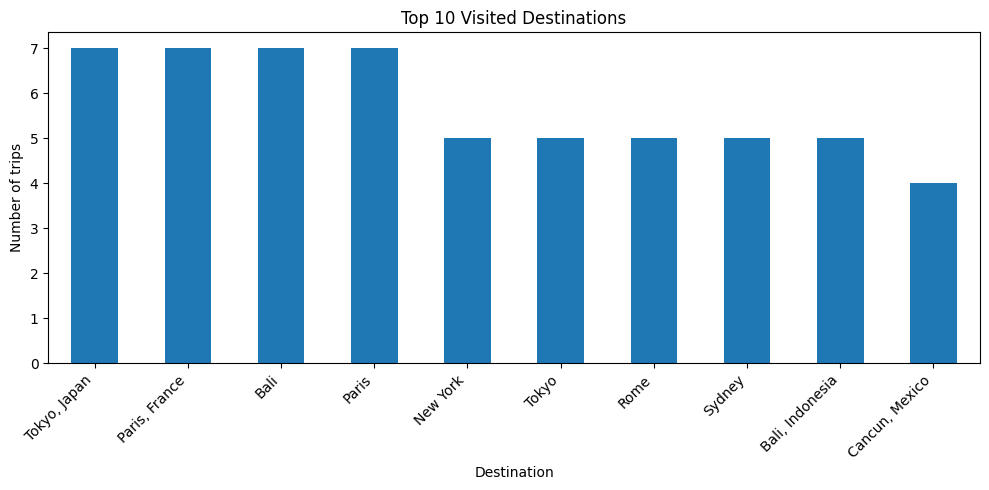

In [ ]:
# Plot 1: Top 10 destinations
# Use the 'destination' column explicitly as the inferred column name was None
top10 = df_clean['destination'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
top10.plot(kind='bar')
plt.title("Top 10 Visited Destinations")
plt.ylabel("Number of trips")
plt.xlabel("Destination")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

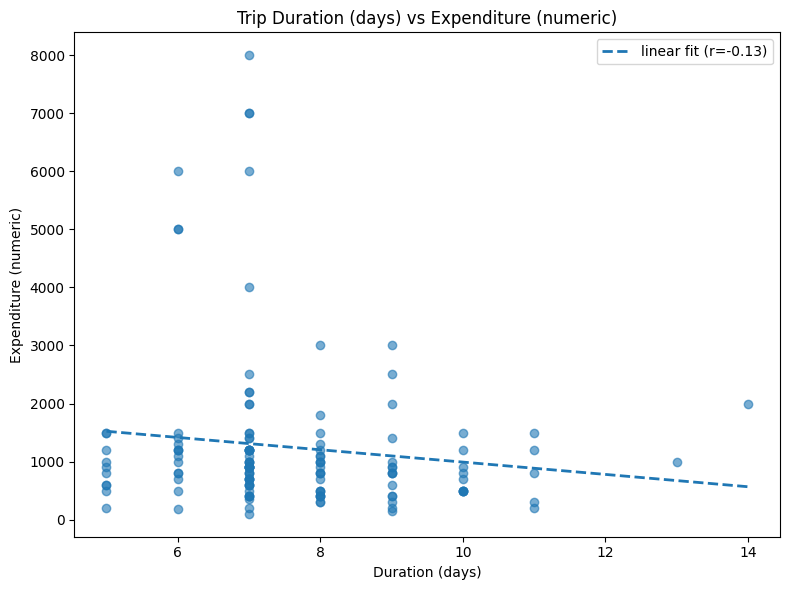

Linear regression: slope -106.173, intercept 2052.64, r=-0.127, p=0.1388


In [ ]:
# Plot 2: Duration vs Expenditure with linear fit
if df_clean is not None and '_duration_num' in df_clean.columns and '_expenditure_num' in df_clean.columns:
    x = df_clean['_duration_num']
    y = df_clean['_expenditure_num']
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, alpha=0.6)
    # Linear regression line
    mask = ~np.isnan(x) & ~np.isnan(y)
    if mask.sum() > 2:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])
        xs = np.linspace(x.min(), x.max(), 100)
        plt.plot(xs, slope*xs + intercept, linestyle='--', linewidth=2, label=f'linear fit (r={r_value:.2f})')
        plt.legend()
    plt.title("Trip Duration (days) vs Expenditure (numeric)")
    plt.xlabel("Duration (days)")
    plt.ylabel("Expenditure (numeric)")
    plt.tight_layout()
    plt.show()
    if mask.sum() > 2:
        print(f"Linear regression: slope {slope:.3f}, intercept {intercept:.2f}, r={r_value:.3f}, p={p_value:.4f}")
else:
    print("Not enough numeric data for scatter plot.")


## Statistical tests
We run:
1. **Pearson correlation** between duration and expenditure.  
2. A simple **t-test** comparing mean expenditure for trips by plane vs non-plane (if transport info exists).  
These tests improve on simple visual inspection from R by providing p-values and effect sizes.


In [ ]:
# Pearson correlation
if df_clean is not None and '_duration_num' in df_clean.columns and '_expenditure_num' in df_clean.columns:
    x = df_clean['_duration_num']
    y = df_clean['_expenditure_num']
    mask = ~np.isnan(x) & ~np.isnan(y)
    if mask.sum() > 2:
        r, p = stats.pearsonr(x[mask], y[mask])
        print(f"Pearson correlation duration~expenditure: r = {r:.3f}, p = {p:.4g} (n={mask.sum()})")
    else:
        print("Not enough points for correlation.")
else:
    print("Missing numeric columns for correlation.")

# t-test: expenditure plane vs non-plane
if col_transport and '_expenditure_num' in df_clean.columns:
    # create boolean plane vs non-plane
    df_transport = df_clean.copy()
    df_transport['is_plane'] = df_transport[col_transport].astype(str).str.contains('plane')
    group_plane = df_transport.loc[df_transport['is_plane'], '_expenditure_num'].dropna()
    group_non = df_transport.loc[~df_transport['is_plane'], '_expenditure_num'].dropna()
    if len(group_plane) > 1 and len(group_non) > 1:
        tstat, pval = stats.ttest_ind(group_plane, group_non, equal_var=False)
        print(f"T-test: plane mean={group_plane.mean():.2f} (n={len(group_plane)}), non-plane mean={group_non.mean():.2f} (n={len(group_non)})")
        print(f"T-statistic={tstat:.3f}, p-value={pval:.4g}")
    else:
        print("Not enough data in plane / non-plane groups for t-test.")
else:
    print("Transport column or expenditure numeric missing; skipping t-test.")


Pearson correlation duration~expenditure: r = -0.127, p = 0.1388 (n=137)
T-test: plane mean=1345.16 (n=62), non-plane mean=1162.40 (n=75)
T-statistic=0.777, p-value=0.4385


## Clustering hypothesis and column selection
**Hypothesis:** Numeric travel attributes (duration and expenditure) will cluster into groups such as:
- Short & low-cost trips (likely day-trips or short leisure),
- Medium duration & medium cost,
- Long & high-cost trips (extended vacations / business).

We'll run **k-means clustering from scratch** using two columns: `duration` and `expenditure`. We'll visualize cluster assignment and show iterative centroid updates for a small number of iterations so you can see how the algorithm converges.


In [ ]:
# Prepare numeric data for clustering
if df_clean is None:
    raise SystemExit("Load and clean data first.")
if '_duration_num' not in df_clean.columns or '_expenditure_num' not in df_clean.columns:
    raise SystemExit("Numeric duration and expenditure required for clustering.")

# Use a subset for faster plotting if dataset is large
cluster_df = df_clean[['_duration_num', '_expenditure_num']].dropna().copy()
cluster_df = cluster_df.rename(columns={'_duration_num':'duration','_expenditure_num':'expenditure'})
print("Clustering data shape:", cluster_df.shape)
display(cluster_df.head())


Clustering data shape: (137, 2)


,duration,expenditure
0,7.0,1200.0
1,5.0,800.0
2,7.0,1000.0
3,14.0,2000.0
4,7.0,700.0


Iter 1 centroid change: 0.6904648826348896
Iter 2 centroid change: 0.3651909732883875
Iter 3 centroid change: 0.38177344239771316
Iter 4 centroid change: 0.7601938742398962
Iter 5 centroid change: 1.4139513771343264
Iter 6 centroid change: 0.5008815521889225
Iter 7 centroid change: 0.0
Final centroids (scaled):
 [[ 1.42467024 -0.23512248]
 [-0.61478417  3.5685051 ]
 [-0.43849838 -0.21655207]]


/tmp/ipython-input-1134179324.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


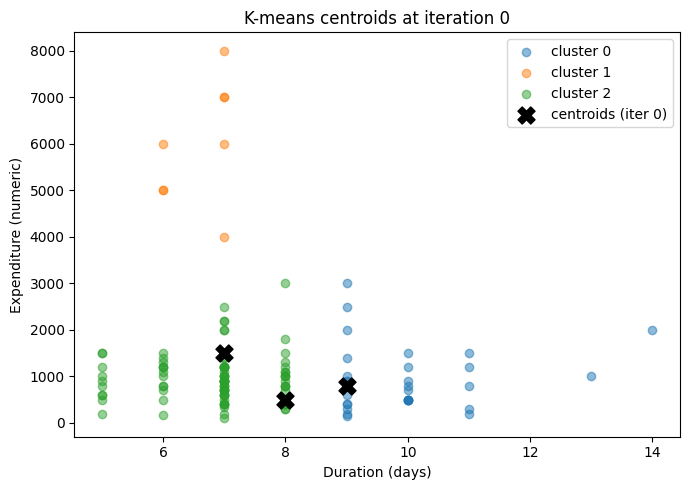

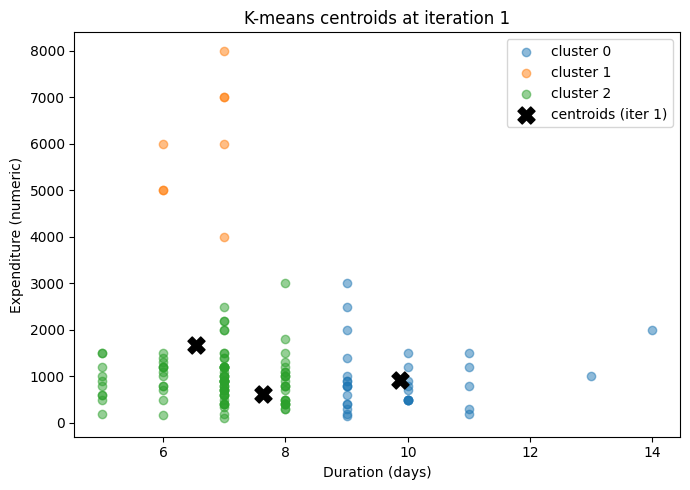

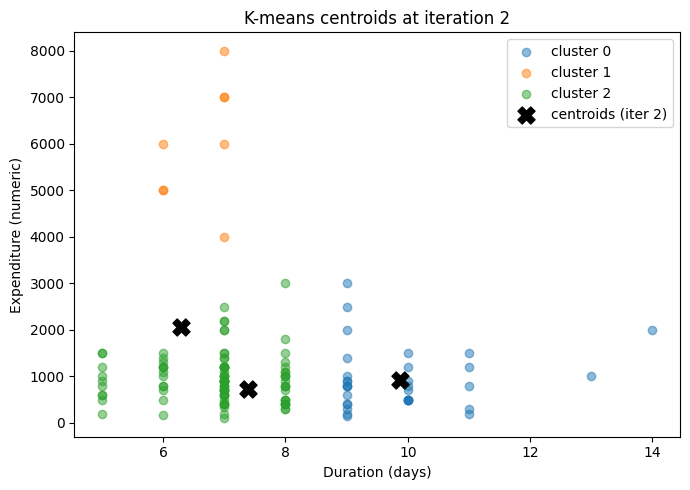

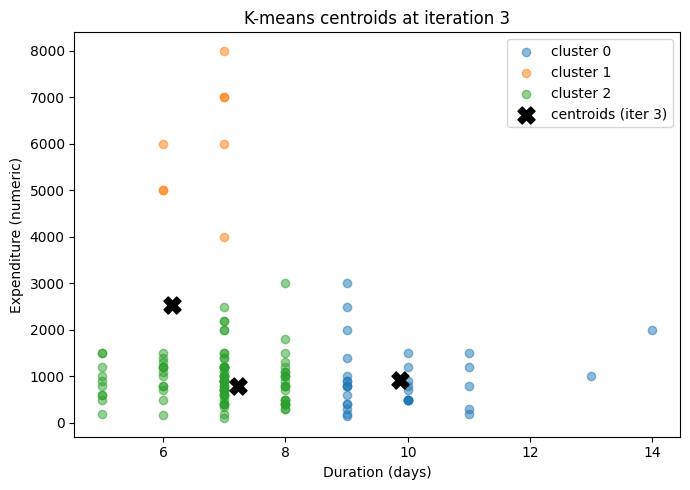

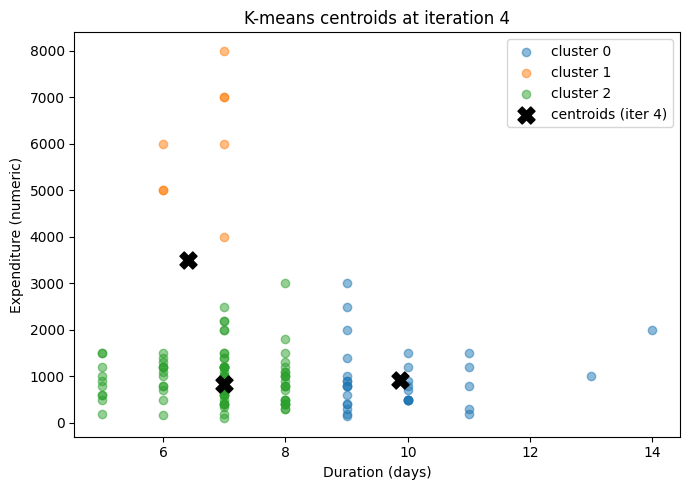

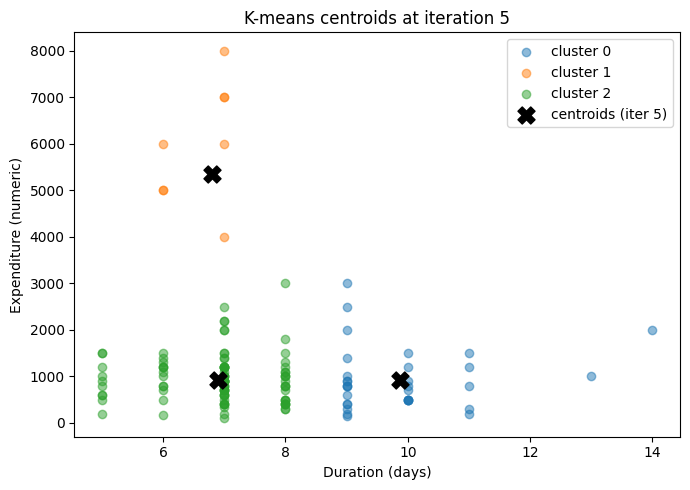

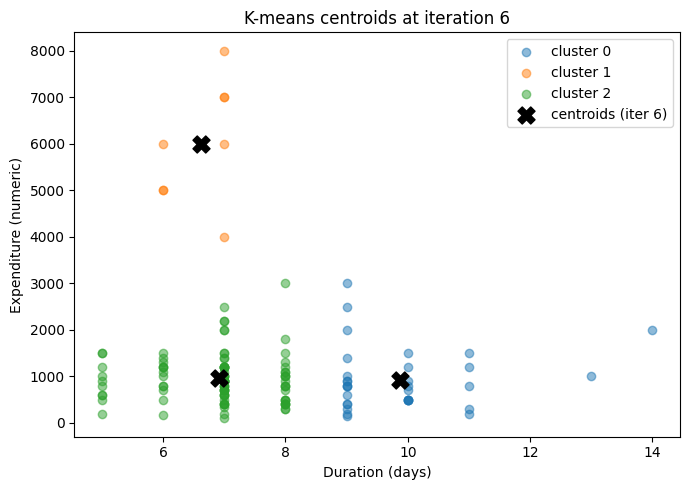

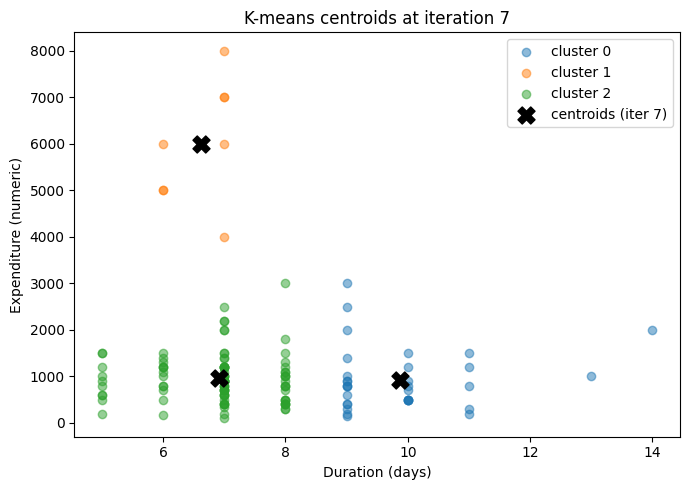

In [ ]:
# K-means from scratch and visualization of steps
import math
from matplotlib import cm

def initialize_centroids(X, k, seed=42):
    np.random.seed(seed)
    # randomly choose k distinct data points as initial centroids
    indices = np.random.choice(range(X.shape[0]), size=k, replace=False)
    return X[indices].astype(float)

def assign_clusters(X, centroids):
    # return array of cluster indices for each point
    dists = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)  # (npoints, k)
    return np.argmin(dists, axis=1)

def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        pts = X[labels==i]
        if len(pts)==0:
            # reinitialize to random point if a centroid lost all points
            new_centroids[i] = X[np.random.choice(range(X.shape[0]))]
        else:
            new_centroids[i] = pts.mean(axis=0)
    return new_centroids

def kmeans_scratch(X, k=3, max_iters=10, verbose=False, seed=42):
    centroids = initialize_centroids(X, k, seed=seed)
    history = [centroids.copy()]
    labels = assign_clusters(X, centroids)
    for it in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        history.append(new_centroids.copy())
        if verbose:
            print(f"Iter {it+1} centroid change:", np.linalg.norm(new_centroids - centroids))
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids
    labels = assign_clusters(X, centroids)
    return centroids, labels, history

# Convert cluster_df to numpy array and scale features (important for k-means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(cluster_df[['duration','expenditure']].values)

# Run k-means from scratch
k = 3  # try 3 clusters as a starting point
centroids, labels, history = kmeans_scratch(X, k=k, max_iters=20, verbose=True, seed=7)
print("Final centroids (scaled):\n", centroids)

# Visualize iteration steps (original scale)
def plot_iteration(X_scaled, history, labels_final, scaler, cluster_df_orig, steps_to_show=None):
    # map scaled back to original space for plotting
    cmap = cm.get_cmap('tab10')
    steps = len(history) if steps_to_show is None else min(steps_to_show, len(history))
    for i in range(steps):
        cen_scaled = history[i]
        cen_orig = scaler.inverse_transform(cen_scaled)
        plt.figure(figsize=(7,5))
        # plot points colored by final labels only (to see final grouping) but show centroids at iteration i
        for cl in range(cen_scaled.shape[0]):
            pts = cluster_df_orig.values[labels_final==cl]
            if len(pts)>0:
                plt.scatter(pts[:,0], pts[:,1], alpha=0.5, label=f'cluster {cl}')
        plt.scatter(cen_orig[:,0], cen_orig[:,1], marker='X', s=150, c='k', label='centroids (iter {})'.format(i))
        plt.title(f'K-means centroids at iteration {i}')
        plt.xlabel('Duration (days)')
        plt.ylabel('Expenditure (numeric)')
        plt.legend()
        plt.tight_layout()
        plt.show()

# Plot first 4 iterations (or all if fewer)
plot_iteration(X, history, labels, scaler, cluster_df)


## Clustering results & discussion
- We ran k-means on standardized `duration` and `expenditure` with k=3.  
- The plotted centroids over iterations show how the algorithm moved to group points.
- **Compare results to hypothesis:** check cluster centroids (in original scale) and counts to see if clusters align with "short-low", "medium", "long-high".
- **Is k-means appropriate?** K-means assumes spherical clusters and uses Euclidean distance; it's appropriate when clusters are convex and similar in size. If your data has skewed distributions or widely different variances, consider:
  - Scaling features (we used standard scaling).
  - Trying different k values (silhouette score / elbow method).
  - Using Gaussian Mixture Models if clusters are elliptical or have different variances.
  - Using hierarchical clustering if cluster count is unknown.


In [ ]:
# Summarize clusters in original scale
if 'labels' in locals():
    centroids_orig = scaler.inverse_transform(centroids)
    print("Centroids (original scale: duration, expenditure):")
    for i, c in enumerate(centroids_orig):
        print(f"Cluster {i}: duration={c[0]:.2f} days, expenditure={c[1]:.2f}")
    # cluster sizes
    counts = Counter(labels)
    print("\nCluster sizes:", counts)
    # Show a small sample of points from each cluster
    for i in range(k):
        print(f"\nSample points from cluster {i}:")
        sample = cluster_df.values[labels==i][:5]
        display(pd.DataFrame(sample, columns=['duration','expenditure']))
else:
    print("Labels not found; run k-means first.")


Centroids (original scale: duration, expenditure):
Cluster 0: duration=9.88 days, expenditure=931.82
Cluster 1: duration=6.62 days, expenditure=6000.00
Cluster 2: duration=6.91 days, expenditure=956.56

Cluster sizes: Counter({np.int64(2): 96, np.int64(0): 33, np.int64(1): 8})

Sample points from cluster 0:


,duration,expenditure
0,14.0,2000.0
1,10.0,500.0
2,9.0,1400.0
3,9.0,900.0
4,10.0,1500.0



Sample points from cluster 1:


,duration,expenditure
0,6.0,5000.0
1,7.0,7000.0
2,6.0,6000.0
3,7.0,4000.0
4,7.0,8000.0



Sample points from cluster 2:


,duration,expenditure
0,7.0,1200.0
1,5.0,800.0
2,7.0,1000.0
3,7.0,700.0
4,5.0,1500.0


## Conclusion & improvement ideas
- The clustering (k-means with k=3) **may** recover groups roughly matching our hypothesis (short/low, mid, long/high), but you must inspect centroids and member points to be sure.
- **Limitations:** k-means requires feature scaling and is sensitive to outliers and initial centroids. It also assumes convex clusters.
- **Improvements:**
  - Try multiple `k` values and use silhouette score or elbow method to pick a better `k`.
  - Remove or winsorize extreme outliers that distort centroids.
  - Add more features (e.g., transport encoded numerically, trip_type) to cluster on richer attributes.
  - Compare with hierarchical clustering or Gaussian Mixture Models.
